In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/Users/dinhngoccan/Desktop/desktop/mô hình tín dụng R/data after.xlsx")


In [2]:
target = ['khả năng trả nợ']
features = ['Mục đích vay', 'Thu nhập ',\
            'Số tiền sổ tiết kiệm','Hôn nhân','Tài sản thế chấp','Chứng minh thu nhập']

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [5]:
X = data[features].values
y = data[target].values

n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=n_state)

In [6]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred_log_train = LR_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred_log_train)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred_log_train))

print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred_log_train),4))

Confusion matrix:
     0     1
0  994   121
1  163  1122 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1115
           1       0.90      0.87      0.89      1285

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400

Logistic Regression accuracy:  0.8817


In [7]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred_log_test = LR_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred_log_test)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred_log_test))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred_log_test),4))

Confusion matrix:
     0    1
0  246   30
1   40  284 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       276
           1       0.90      0.88      0.89       324

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Logistic Regression accuracy:  0.8833


In [8]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data.loc[:,features].columns, 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
1,Thu nhập,-1.274044e-07
2,Số tiền sổ tiết kiệm,6.186849e-08
0,Mục đích vay,-3.725819e-14
3,Hôn nhân,-2.117057e-14
5,Chứng minh thu nhập,-8.166532e-15
4,Tài sản thế chấp,3.628036e-15


In [9]:
#df.to_excel("/Users/dinhngoccan/Desktop/Book2.xlsx")

<Axes: ylabel='FeatureName'>

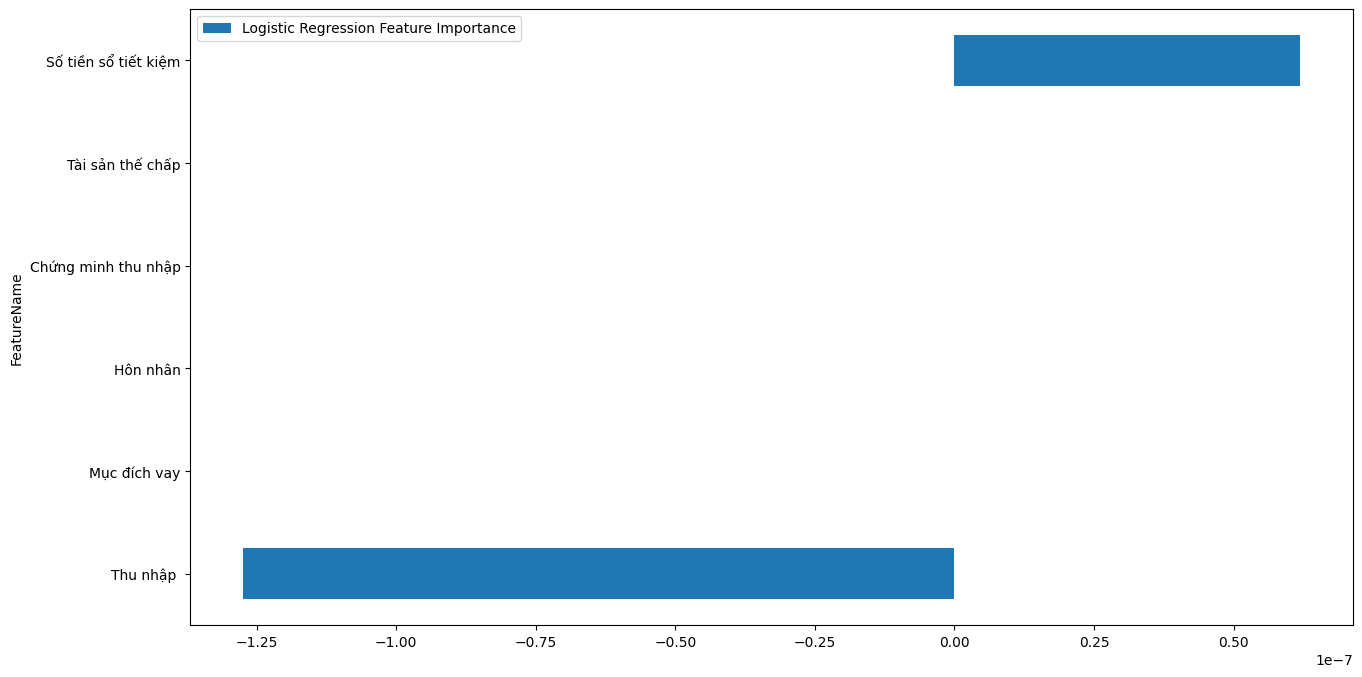

In [10]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

/var/folders/6y/ng3thm253779cslcjdsw4x1w0000gn/T/ipykernel_28873/1662587078.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
/var/folders/6y/ng3thm253779cslcjdsw4x1w0000gn/T/ipykernel_28873/1662587078.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


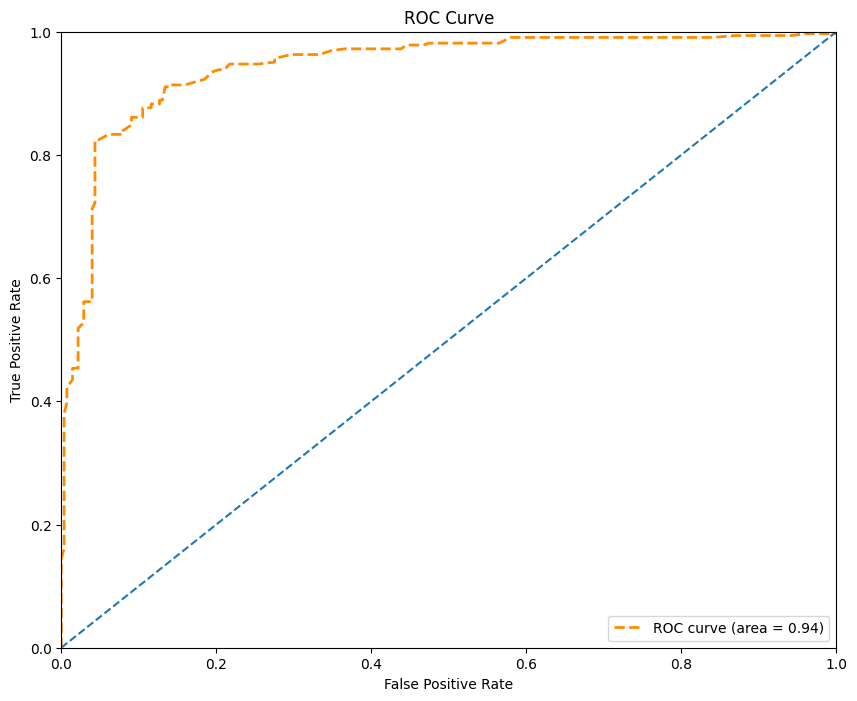

In [11]:
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)